In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Lotka-Volterra模型，包括雄性和雌性个体的动态
def lotka_volterra(y, t, R, f, lambd, alpha, beta, delta_p, delta_r):
    N_male, N_female, N_predator, N_parasite = y
    dN_male_dt = R * f - lambd * N_predator * N_male
    dN_female_dt = R * (1 - f) - lambd * N_parasite * N_female
    dN_predator_dt = alpha * N_predator * N_male - delta_p * N_predator
    dN_parasite_dt = beta * N_parasite * N_female - delta_r * N_parasite
    return [dN_male_dt, dN_female_dt, dN_predator_dt, dN_parasite_dt]

In [2]:
# 参数
R = 0.1  # 繁殖率
f = 0.5  # 基因或基因组相关函数的简化示例
lambd = 0.01  # 捕食/寄生影响因子
alpha = 0.02  # 捕食者转化率
beta = 0.02  # 寄生者转化率
delta_p = 0.05  # 捕食者自然死亡率
delta_r = 0.05  # 寄生者自然死亡率

# 初始条件
y0 = [50, 50, 10, 10]  

# 时间点
t = np.linspace(0, 100, 1000)

In [3]:
# 求解ODE
sol = odeint(lotka_volterra, y0, t, args=(R, f, lambd, alpha, beta, delta_p, delta_r))

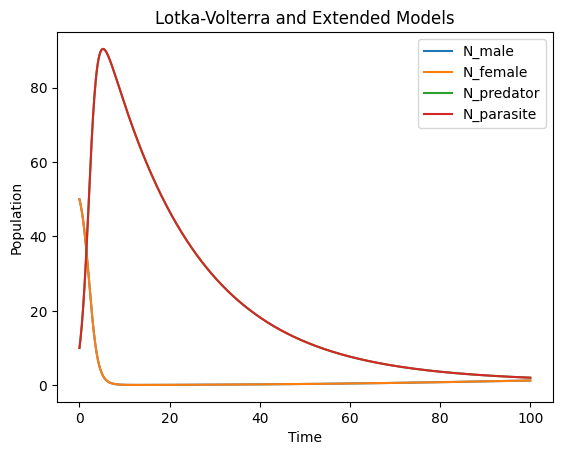

In [4]:
# 绘图
plt.plot(t, sol[:, 0], label='N_male')
plt.plot(t, sol[:, 1], label='N_female')
plt.plot(t, sol[:, 2], label='N_predator')
plt.plot(t, sol[:, 3], label='N_parasite')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Lotka-Volterra and Extended Models')
plt.show()